# Question 1: Convert covariance matrix into correlation matrix using numpy

## 1A Answer: Covariance and correlation both show how two factors are related to eachother:  

- **Covariance** tells you if the two factors move together (positive) or in opposite directions (negative). But it doesn’t say how strong the relationship is.  

- **Correlation** is is similar except it shows both the direction and the strength of the relationship on a scale from -1 to 1, so it’s easier to understand.  

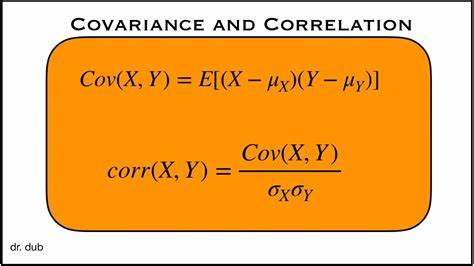

The equation above shows that covarience measures the variability of X and Y, while correlation standardizes covariance by dividing it by the product of the standard deviations, resulting in a value between -1 and 1 indicating the relationship strength.

## 1B Answer: Load IRIS Dataset + Do some Exploratory visualizations

Iris Dataset Loaded


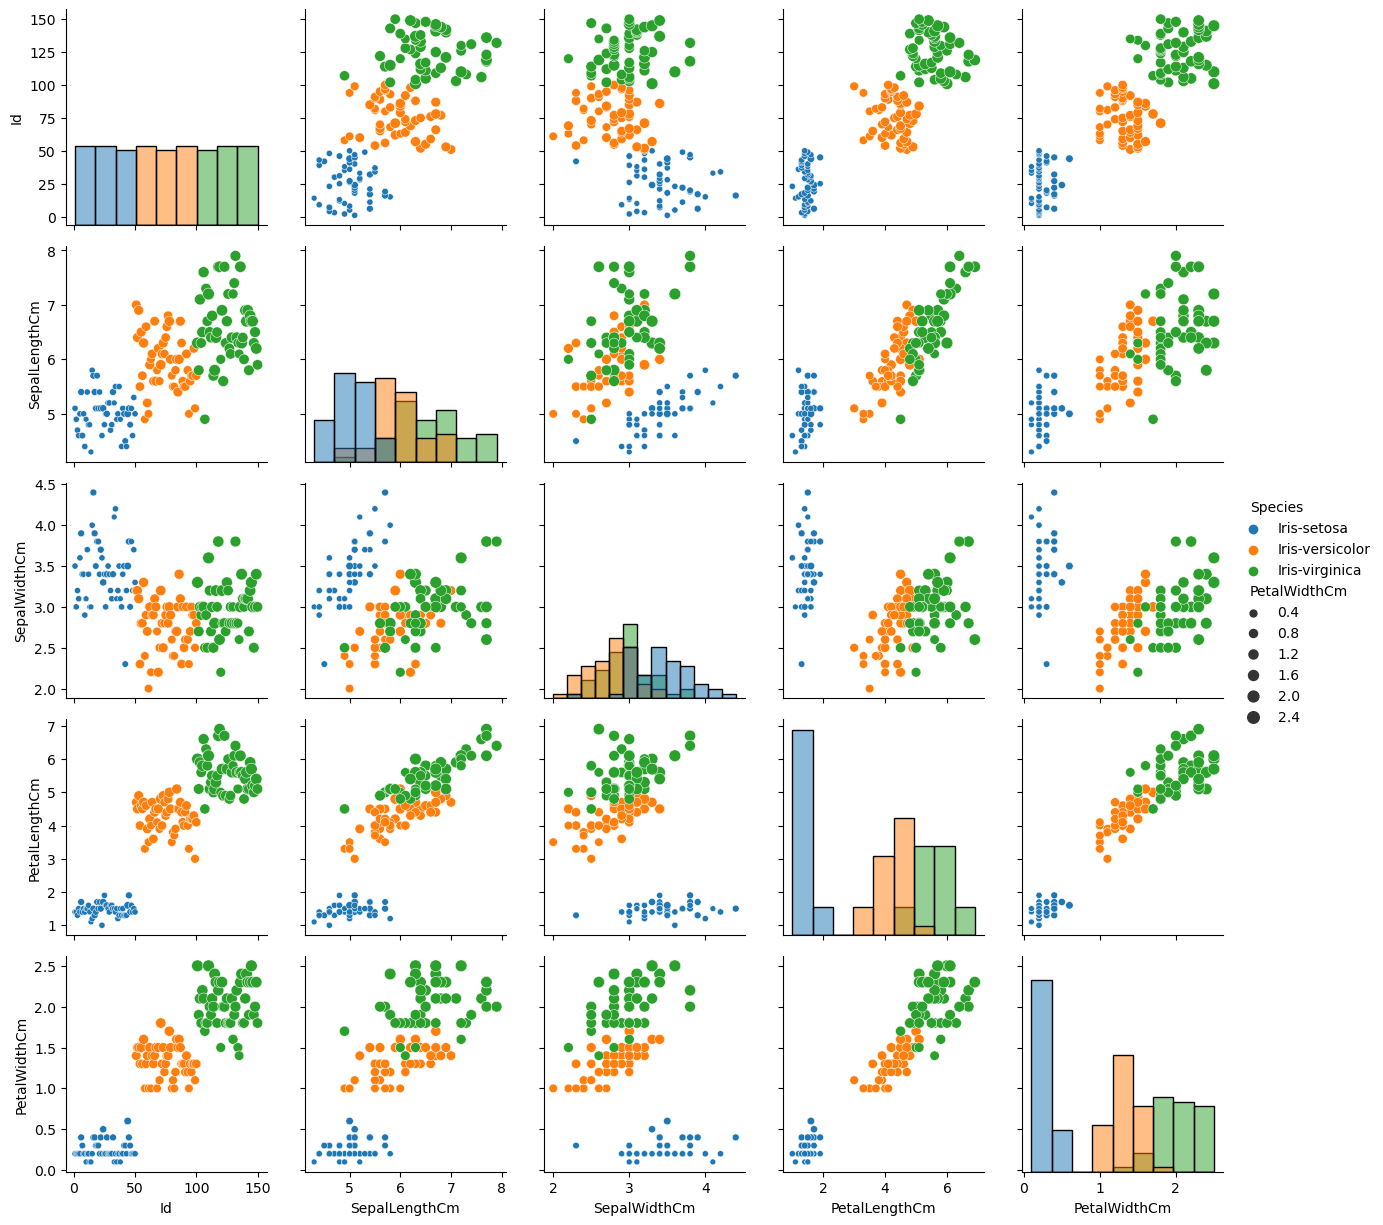

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1B ANSWER: Load the Iris dataset
iris_data = pd.read_csv("Iris.csv")
number_features = iris_data.iloc[:, 1:-1]
print("Iris Dataset Loaded")

g = sns.PairGrid(iris_data, hue="Species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, size=iris_data["PetalWidthCm"])
g.add_legend(title="", adjust_subtitles=True)


Exploratory analysis of pairplots of the Iris Dataset, where the color indicates the species and the size of the dots is the petal width. In general looking at these graphs I learned that the Iris Setosa Species has very different dimensions than the Iris Versicolor and Iris Virginica species which seem more closely related based on their sepal and petal dimensions.

## 1C-a and 1C-b Answers: Compute covariance between two variables and between two matricies

In [16]:
# 1C-a ANSWER: A function to calculate the covariance between two variables
def calcCov(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)
    return covariance

In [18]:

# 1C-b ANSWER: A function to compute the covariance matrix
def covMat(data):
    num_features = data.shape[1]
    covariance_matrix = np.zeros((num_features, num_features))
    
    for i in range(num_features):
        for j in range(num_features):
            covariance_matrix[i][j] = calcCov(data.iloc[:, i], data.iloc[:, j])
    
    return covariance_matrix

my_covariance_matrix = covMat(number_features)
print("My Covariance Matrix:")
print(my_covariance_matrix)

My Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


## 1D Answer: Compare the results of your function with NumPy's np.cov

In [5]:
# 1D ANSWER: Compare the results of your function with NumPy's np.cov
my_covariance_matrix = covMat(number_features)
numpy_covariance_matrix = np.cov(number_features, rowvar=False)

# Print Results
print("My Covariance Matrix:")
print(my_covariance_matrix)

print("\nNumPy Covariance Matrix:")
print(numpy_covariance_matrix)

# Verify if both matrices are equal
print("\nAre the covariance matrices (basically) equal?", np.allclose(my_covariance_matrix, numpy_covariance_matrix))
#Note: Had to use the allclose function bc way down in the decimals they aren't exacly equal but they are very very close
print("Had to use the allclose function bc way down in the decimals they aren't exacly equal but they are very very close")

My Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

NumPy Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

Are the covariance matrices (basically) equal? True
Had to use the allclose function bc way down in the decimals they aren't exacly equal but they are very very close


## 1E Answer: A function to compute the Correlation matrix

In [6]:

# 1E ANSWER: A function to compute the Correlation matrix
def corrMat(data):
    covariance_matrix = covMat(data)
    standard_deviations = np.sqrt(np.diag(covariance_matrix))
    num_features = data.shape[1]
    correlation_matrix = np.zeros((num_features, num_features))
    
    for i in range(num_features):
        for j in range(num_features):
            correlation_matrix[i][j] = covariance_matrix[i][j] / (standard_deviations[i] * standard_deviations[j])
    return correlation_matrix

my_correlation_matrix = corrMat(number_features)

print("\nMy Correlation Matrix:")
print(my_correlation_matrix)



My Correlation Matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]



## 1F Answer: Validate the correlation matrix implementation

In [7]:

# 1F ANSWER: Validate the correlation matrix implementation
my_correlation_matrix = corrMat(number_features)
numpy_correlation_matrix = np.corrcoef(number_features, rowvar=False)

# Print Results
print("\nMy Correlation Matrix:")
print(my_correlation_matrix)

print("\nNumPy Correlation Matrix:")
print(numpy_correlation_matrix)

# Verify if both matrices are equal
print("\nAre the correlation matrices (basically) equal?", np.allclose(my_correlation_matrix, numpy_correlation_matrix))
#Note: Had to use the allclose function bc way down in the decimals they aren't exacly equal but they are very very close
print("Had to use the allclose function because they aren't exacly equal but they are very very close")



My Correlation Matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]

NumPy Correlation Matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]

Are the correlation matrices (basically) equal? True
Had to use the allclose function because they aren't exacly equal but they are very very close


## 1G Answer: Visualization to communicate the results

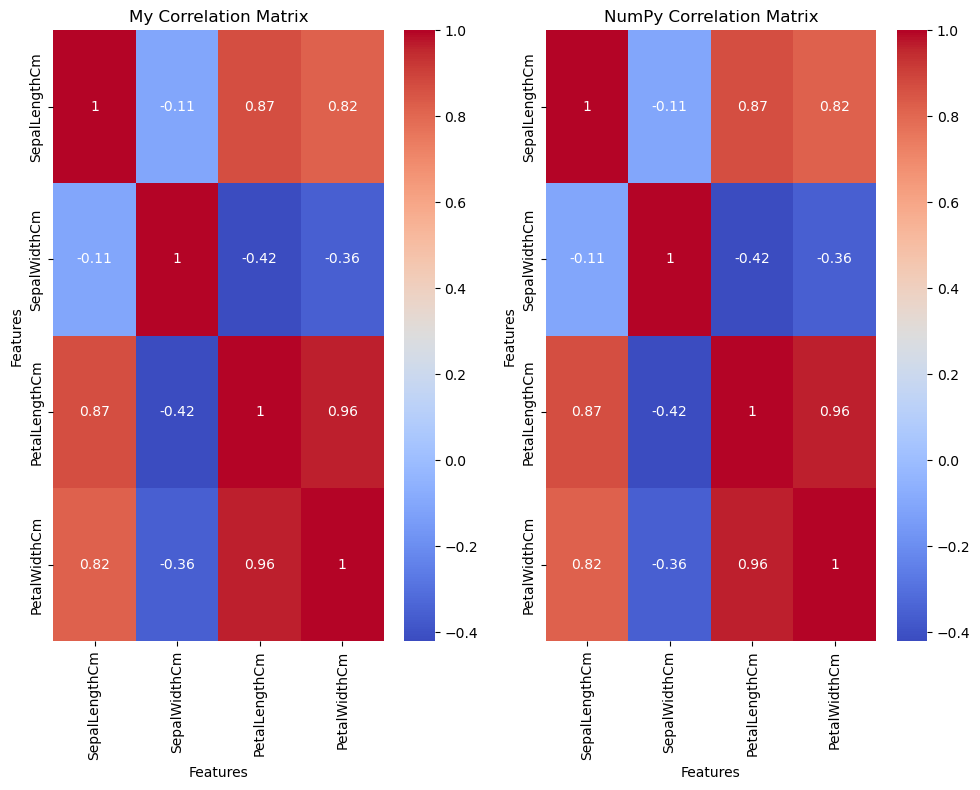

In [8]:

#1G ANSWER: Visualization to communicate the results
plt.figure(figsize=(10, 8))

# Heatmap for custom correlation matrix
plt.subplot(1, 2, 1)
sns.heatmap(my_correlation_matrix, annot=True, cmap="coolwarm", xticklabels=number_features.columns, yticklabels=number_features.columns)
plt.title("My Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Heatmap for NumPy correlation matrix
plt.subplot(1, 2, 2)
sns.heatmap(numpy_correlation_matrix, annot=True, cmap="coolwarm", xticklabels=number_features.columns, yticklabels=number_features.columns)
plt.title("NumPy Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

The correlation matricies for my correlation matrix and numpy's correlation matrix are shown above to be nearly identical with mine on the left and numpy's on the right

# Question 2: Laptop Price Dataset Analysis


## Plot the price of all the laptops

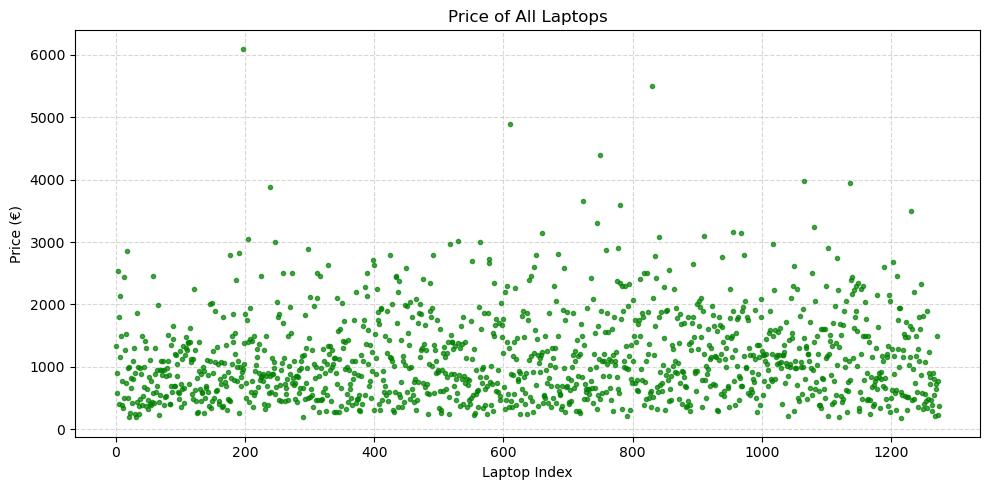

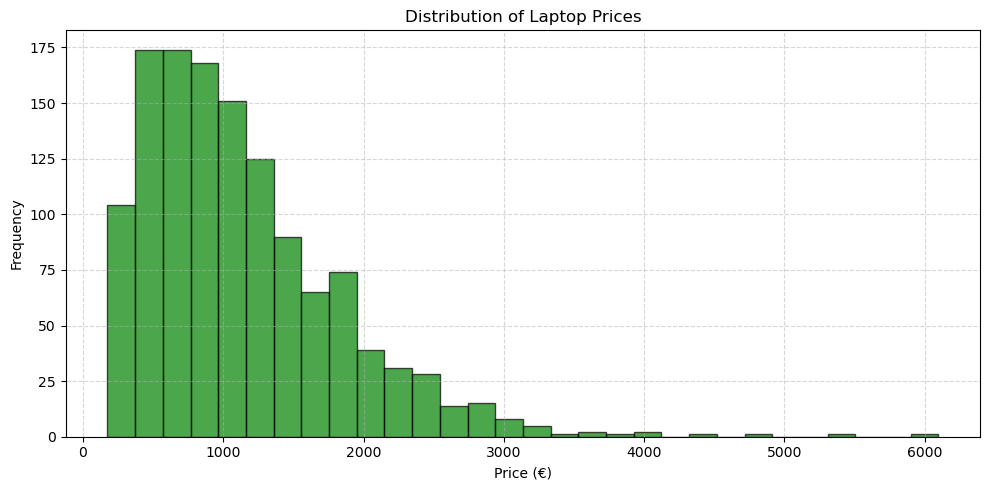

In [9]:
# Load and clean the dataset
data = pd.read_csv("laptop_price - dataset.csv")
data.columns = data.columns.str.strip().str.lower()  # Strip spaces and lowercase column names

# 1. Plot all laptop prices
plt.figure(figsize=(10, 5))
plt.plot(data['price (euro)'], marker='.', linestyle='', color='green', alpha=0.7)
plt.title("Price of All Laptops")
plt.xlabel("Laptop Index")
plt.ylabel("Price (€)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Graph price distribution
plt.figure(figsize=(10, 5))
plt.hist(data['price (euro)'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



The plot of all laptop prices inducates that the most expensive one is around 6000 euros, however most of them are around 750-1250 euros

## Which company has on average the most expensive laptop? What is the average  laptop price for each company?

Average Laptop Price by Company:
company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: price (euro), dtype: float64


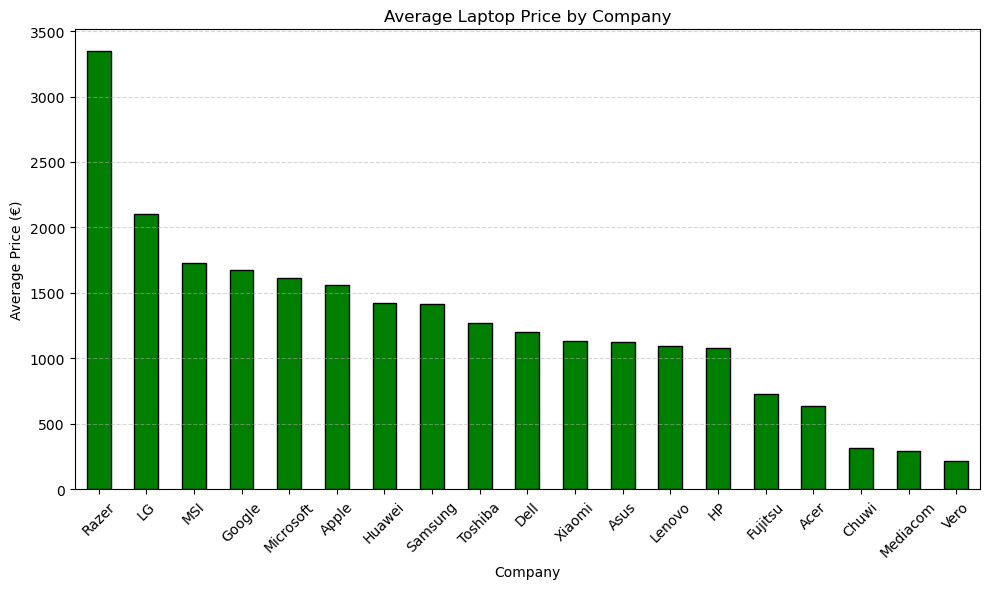

In [10]:

# 2. Average price per company
avg_price = data.groupby('company')['price (euro)'].mean().sort_values(ascending=False)

# Print the average price of each company's laptops
print("Average Laptop Price by Company:")
print(avg_price)

# Plot average price
plt.figure(figsize=(10, 6))
avg_price.plot(kind='bar', color='green', edgecolor='black')
plt.title("Average Laptop Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The most expensive laptops come from Razer (which makes sense since they make gaming laptops) with the average price of their laptops being 3300 euros. The top 5 most expensive were Razer (3346), LG(2099), MSI(1728), Google(1677), and Microsoft(1612). I was surprised that razer was more expensive then the next most expensive one (LG) by over 1000 euros, (30ish percent more expensive than the next most expensive competitor)


## Find the different types of Operating systems present in the data - under the column name "OpSys". 

## Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

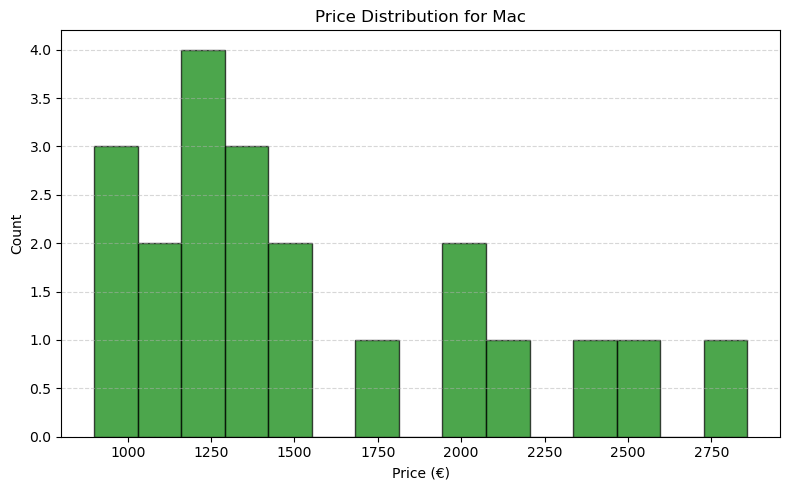

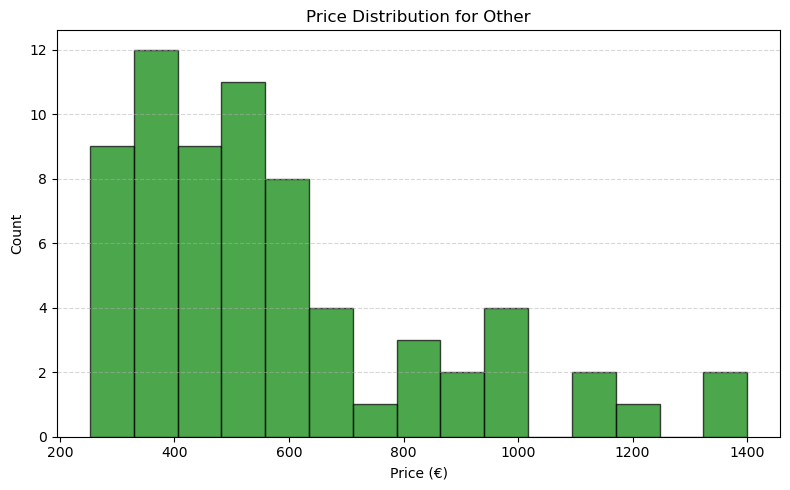

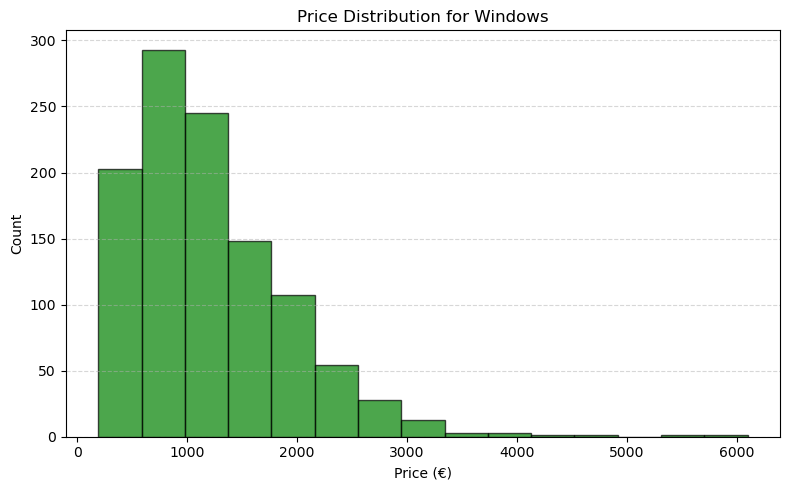

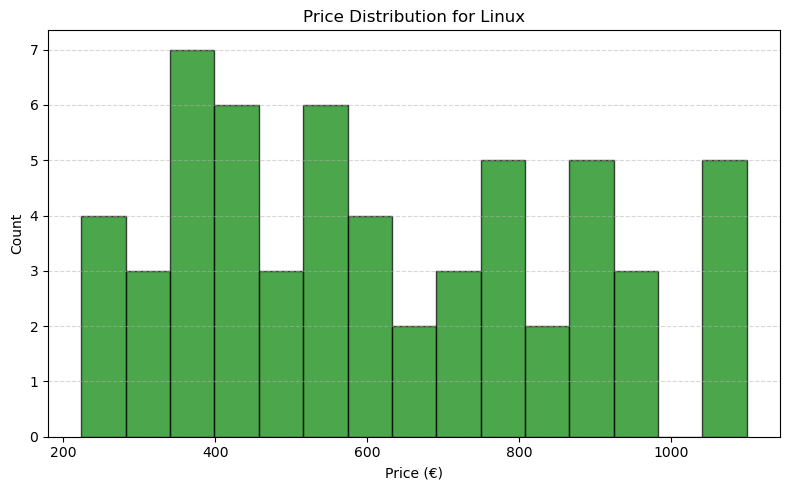

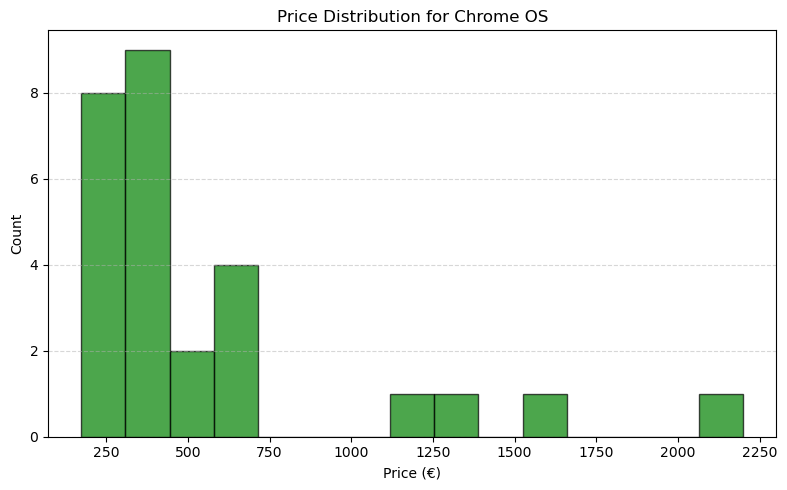

In [11]:

# Clean 'opsys' column for OS categorization
def clean_opsys(os):
    os = os.lower()
    if 'windows' in os:
        return 'Windows'
    elif 'mac' in os or 'os x' in os:
        return 'Mac'
    elif 'linux' in os:
        return 'Linux'
    elif 'chrome' in os:
        return 'Chrome OS'
    else:
        return 'Other'

data['opsys_cleaned'] = data['opsys'].apply(clean_opsys)

# Plot price distribution for each OS
for os in data['opsys_cleaned'].unique():
    plt.figure(figsize=(8, 5))
    subset = data[data['opsys_cleaned'] == os]
    plt.hist(subset['price (euro)'], bins=15, color='green', edgecolor='black', alpha=0.7)
    plt.title(f"Price Distribution for {os}")
    plt.xlabel("Price (€)")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


Most of the operating systems were clustered in a price range (such as around 1000-1200 euros for windows and mac) so I was surprised that linux based machines seemed evenly distributed across price ranges 

## What is the relationship between RAM and computer price? add an adequate plot to  support your findings

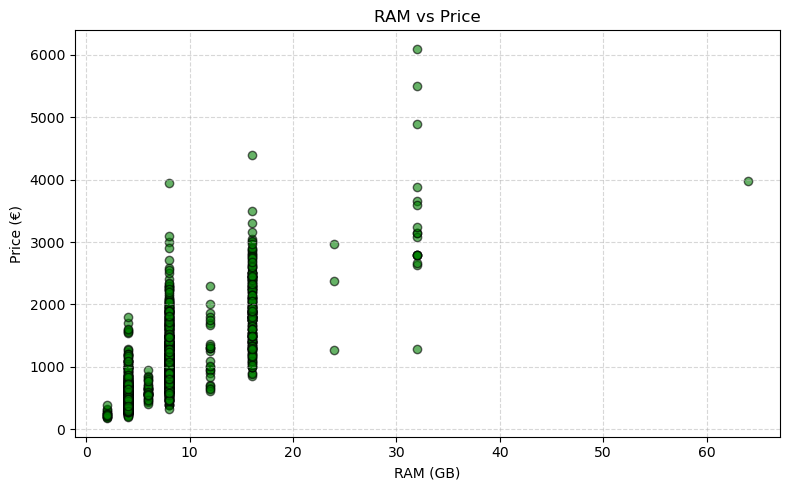

In [12]:
# RAM vs Price relationship
plt.figure(figsize=(8, 5))
plt.scatter(data['ram (gb)'], data['price (euro)'], color='green', alpha=0.6, edgecolor='black')
plt.title("RAM vs Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (€)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In general, the more RAM a computer has the more expensive it is. This is shown in the graph above where most computers in the 0-10 gb of ram tend to be around 1000-2000 euros, wheras the majority of the machines with 32gb of ram cost around 3000 euros

## Create a new column for the dataframe called "Storage type" that extracts the  storage type from the column "Memory".

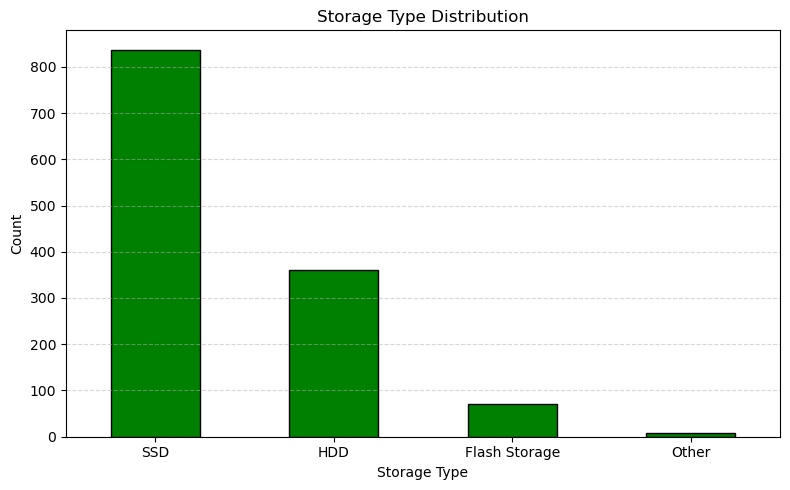

In [13]:
#Extract storage types and analyze
def extract_storage(memory):
    if 'SSD' in memory:
        return 'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Flash Storage' in memory:
        return 'Flash Storage'
    else:
        return 'Other'

data['storage_type'] = data['memory'].apply(extract_storage)

# Bar plot for storage types
storage_count = data['storage_type'].value_counts()
plt.figure(figsize=(8, 5))
storage_count.plot(kind='bar', color='green', edgecolor='black')
plt.title("Storage Type Distribution")
plt.xlabel("Storage Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The graph above indicated the vast majority of computers is SSD for storage rather then HDD, Flash, or other storage methods

# Question 3: Additional Plots

I had a few other question ideas for plots:


- Are different styles of laptops more expensive than others? are gaming laptops the most expensive in general since that is the majority of the computers made by razer? (Average Price by laptop type (notebook, gaming, etc) Bar graph)

- Does the weight of a laptop correlate with how expensive it is? (Average Price by laptop weight bar graph)

- Does the weignt of a laptop correlate with how much ram and what kind of GPU it has? or are other components more likely to be contributers to the weight (heatmap or 3d plot of ram, gpu type, and weight)?

- How much does CPU frequency and ram contribute to the price of a computer (heatmap of cost by cpu frequency and ram)


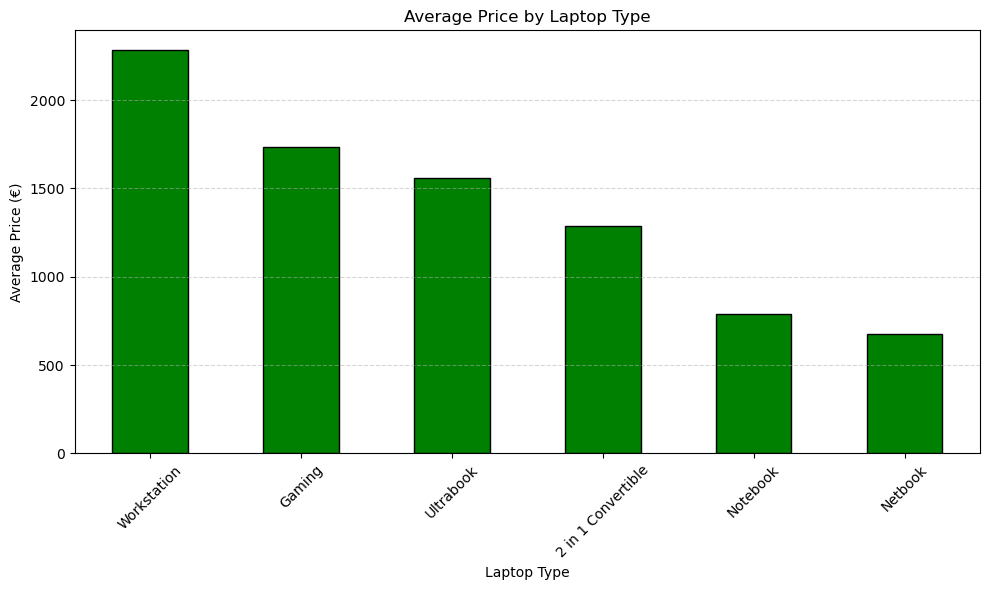

In [14]:
plt.figure(figsize=(10, 6))
data.groupby('typename')['price (euro)'].mean().sort_values(ascending=False).plot(kind='bar', color='green', edgecolor='black')
plt.title("Average Price by Laptop Type")
plt.xlabel("Laptop Type")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Workstations were the most expensive category of computer, I was not expecting this as I assumed gaming laptops would be the most expensive on average

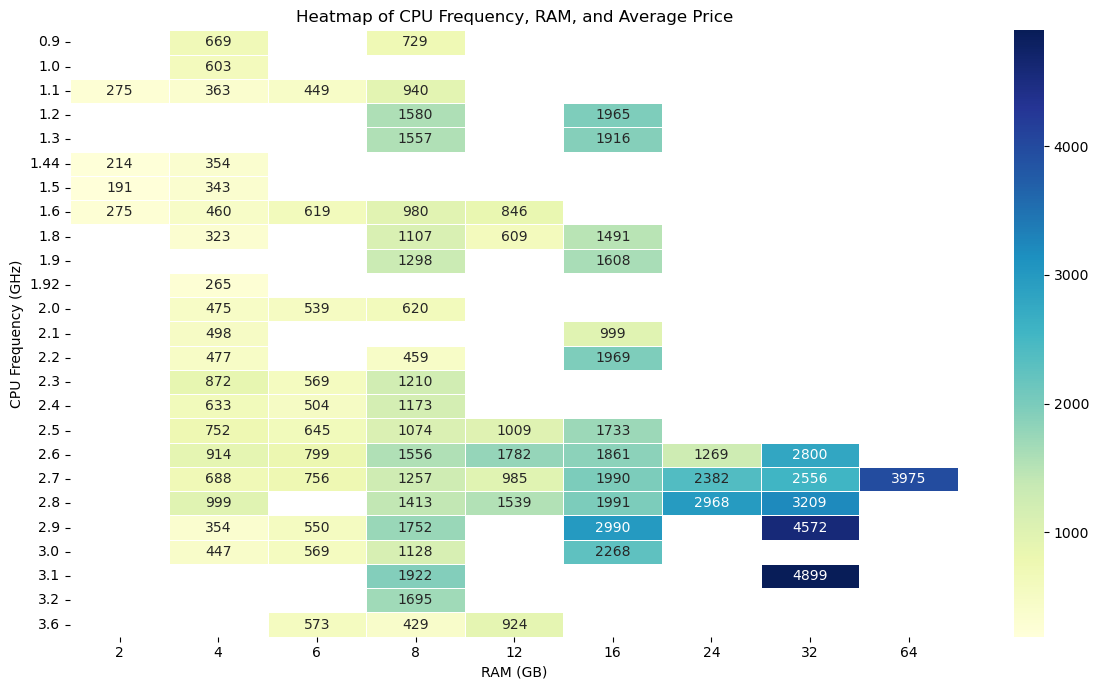

In [15]:
heatmap_data = data.pivot_table(values='price (euro)',
                                index='cpu_frequency (ghz)',
                                columns='ram (gb)',
                                aggfunc='mean')

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of CPU Frequency, RAM, and Average Price")
plt.xlabel("RAM (GB)")
plt.ylabel("CPU Frequency (GHz)")
plt.tight_layout()
plt.show()


In general there is a high correlation between CPU frequency, RAM, and and price however there are several laptops that seem likea surprisingly good deal (such as the one with 24GB of ram and 2.6 GHz CPU for 1269, where most of the other comparable computers on those metrics are over 2000 euros)